In [2]:
import pandas as pd

In [3]:
df = {}
for k in ["train", "val", "test"]:
    df[k] = {}
    for c in ["data", "nllf", "lf"]:
        df[k][c] = pd.read_excel(f"setting/{c}_{k}.xlsx", index_col=0)

In [4]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [5]:
X_train = df["train"]["lf"]
X_val = df["val"]["lf"]
X_test = df["test"]["lf"]

y_train = (df["train"]["data"]["Final decision"] == "INCLUDE").apply(int)
y_val = (df["val"]["data"]["Final decision"] == "INCLUDE").apply(int)
y_test = (df["test"]["data"]["Final decision"] == "INCLUDE").apply(int)

In [6]:
new_best_features = X_train.columns

In [9]:
clf = DecisionTreeClassifier(random_state=42, max_depth=5)
clf.fit(X_train[new_best_features], y_train)
print(clf.score(X_train[new_best_features], y_train))
print(classification_report(y_test, clf.predict(X_test[new_best_features]), digits=4))

0.7257142857142858
              precision    recall  f1-score   support

           0     0.6250    0.8245    0.7110       188
           1     0.7829    0.5613    0.6538       212

    accuracy                         0.6850       400
   macro avg     0.7039    0.6929    0.6824       400
weighted avg     0.7087    0.6850    0.6807       400



In [7]:
from matplotlib import pyplot as plt
from sklearn import tree

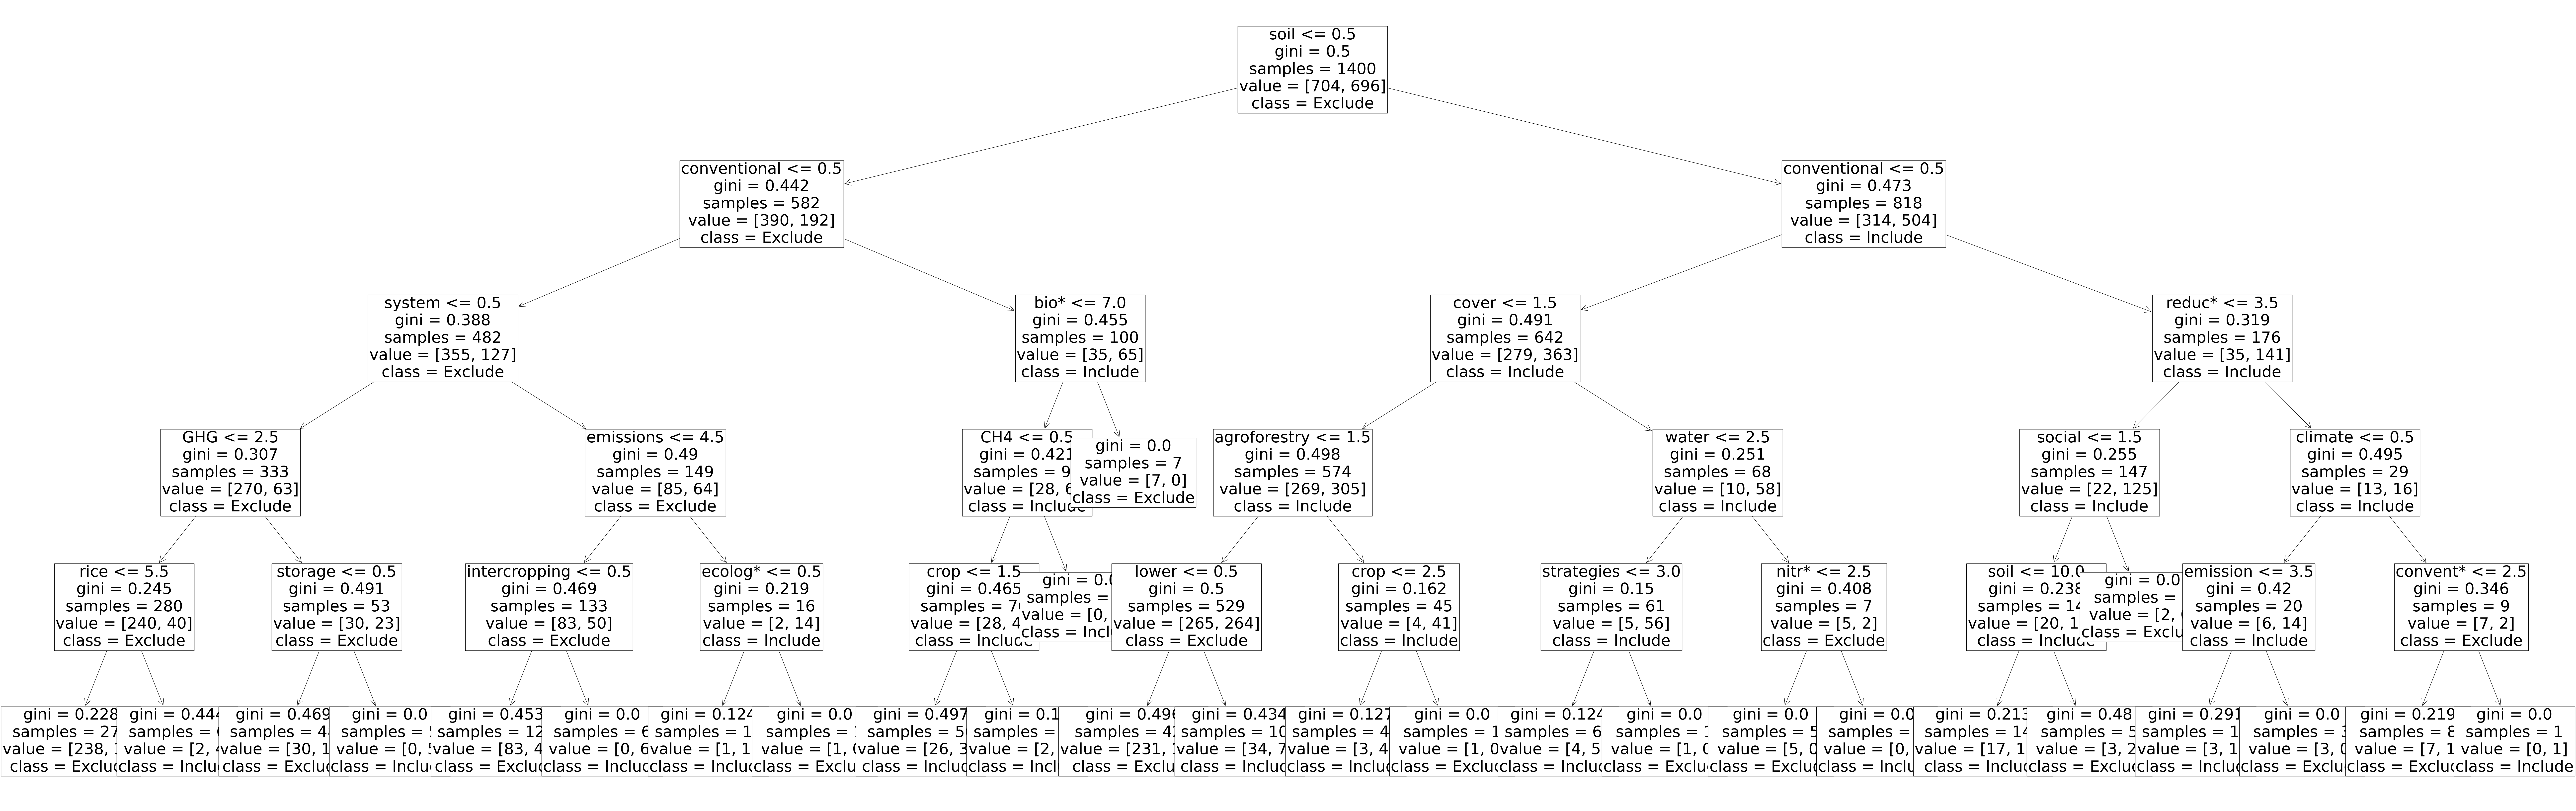

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(265//2, 85//2))
tree.plot_tree(clf, feature_names=new_best_features, ax=ax, fontsize=45, class_names=["Exclude","Include"]);

In [11]:
clf.feature_names_in_[[i for i in clf.tree_.feature if i>=0]]

array(['soil', 'conventional', 'system', 'GHG', 'rice', 'storage',
       'emissions', 'intercropping', 'ecolog*', 'bio*', 'CH4', 'crop',
       'conventional', 'cover', 'agroforestry', 'lower', 'crop', 'water',
       'strategies', 'nitr*', 'reduc*', 'social', 'soil', 'climate',
       'emission', 'convent*'], dtype=object)

In [17]:
clf = DecisionTreeClassifier(random_state=42, max_depth=8)
clf.fit(X_train[new_best_features], y_train)
print(clf.score(X_train[new_best_features], y_train))
print(classification_report(y_test, clf.predict(X_test[new_best_features]), digits=4))
set(clf.feature_names_in_[[i for i in clf.tree_.feature if i>=0]])

0.8357142857142857
              precision    recall  f1-score   support

           0     0.6384    0.7606    0.6942       188
           1     0.7443    0.6179    0.6753       212

    accuracy                         0.6850       400
   macro avg     0.6914    0.6893    0.6847       400
weighted avg     0.6945    0.6850    0.6841       400



{'CH4',
 'GHG',
 'N2O',
 'agricultural',
 'agriculture',
 'agroforestry',
 'agroforestry systems',
 'bio*',
 'carbon',
 'change',
 'climate',
 'conservation',
 'conventional',
 'cover',
 'crop',
 'economy',
 'emission',
 'emission*',
 'emissions',
 'experiment',
 'fallow',
 'farm',
 'farms',
 'gas',
 'global warm*',
 'greenhouse',
 'higher',
 'impact',
 'impact of',
 'increas*',
 'integrate*',
 'intensification',
 'intercropping',
 'intercropping systems',
 'livestock',
 'lower',
 'methane',
 'mitig*',
 'model',
 'net',
 'nitr*',
 'organic',
 'potential',
 'practices',
 'productivity',
 'rainfed',
 'reduc*',
 'rice',
 'scenario',
 'seasonal',
 'significantly',
 'social',
 'soil',
 'soils',
 'soybean',
 'storage',
 'synthetic',
 'system',
 'systems',
 'till',
 'tillage',
 'water'}